In [5]:
import pandas as pd
train_file_path = "/content/DailyDelhiClimateTrain.csv"
test_file_path = "/content/DailyDelhiClimateTest.csv"
df_train = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)

df_train['date'] = pd.to_datetime(df_train['date'])
df_train.set_index('date', inplace=True)
df_test['date'] = pd.to_datetime(df_test['date'])
df_test.set_index('date', inplace=True)

print("Train and Test datasets loaded successfully!")
print("\nTrain Dataset:")
print(df_train.head())

print("\nTest Dataset:")
print(df_test.head())

Train and Test datasets loaded successfully!

Train Dataset:
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000

Test Dataset:
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2017-01-01  15.913043  85.869565    2.743478     59.000000
2017-01-02  18.500000  77.222222    2.894444   1018.277778
2017-01-03  17.111111  81.888889    4.016667   1018.333333
2017-01-04  18.700000  70.050000    4.545000   1015.700000
2017-01-05  18.388889  74.944444    3.300000   1014.333333


In [6]:
# Check structure of the dataset
print("\nTrain Dataset Info:")
print(df_train.info())

print("\nTest Dataset Info:")
print(df_test.info())

# Check for missing values
missing_train = df_train.isnull().sum()
missing_test = df_test.isnull().sum()

print("\nMissing values in Train Dataset:\n", missing_train)
print("\nMissing values in Test Dataset:\n", missing_test)

# Handle missing values: Fill with mean
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)

# Describe key statistics
print("\nKey Statistics for Train Dataset:\n", df_train.describe())
print("\nKey Statistics for Test Dataset:\n", df_test.describe())



Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB
None

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 2017-01-01 to 2017-04-24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      114 non-null    float64
 1   humidity      114 non-null    float64
 2   wind_speed    114 non-null    float64
 3   meanpressure  114 non-null    float64
dtypes: float64(4)
memory usage: 4.5 KB
None

Missing values in Train Dataset:
 meantemp        0
humidity        0
wind_speed      0
meanpressure    

<Figure size 1200x800 with 0 Axes>

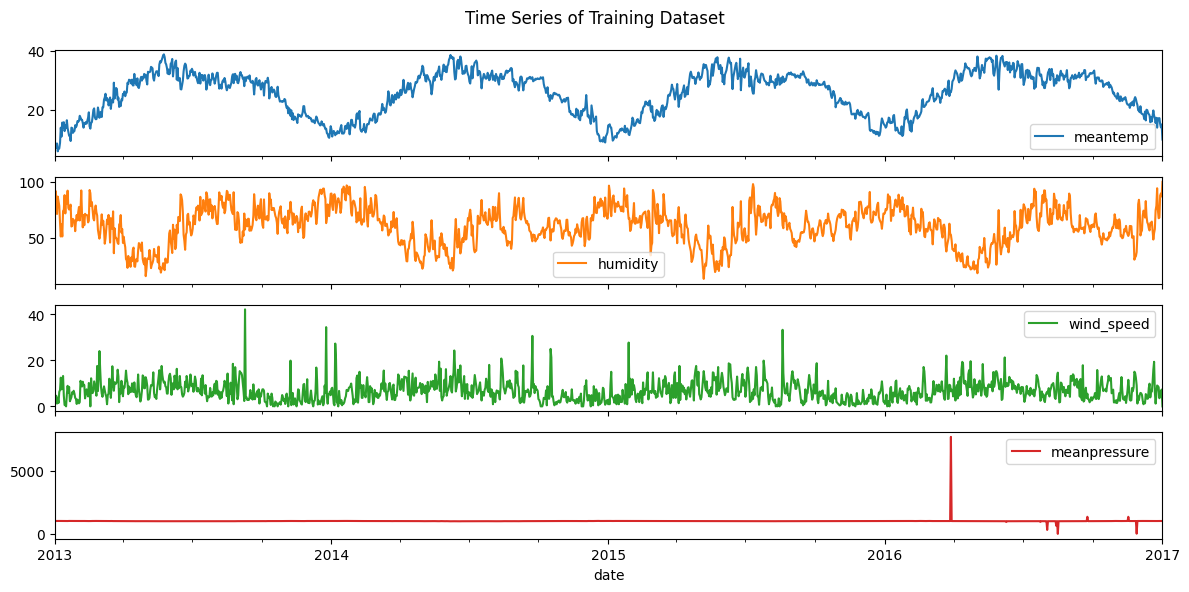

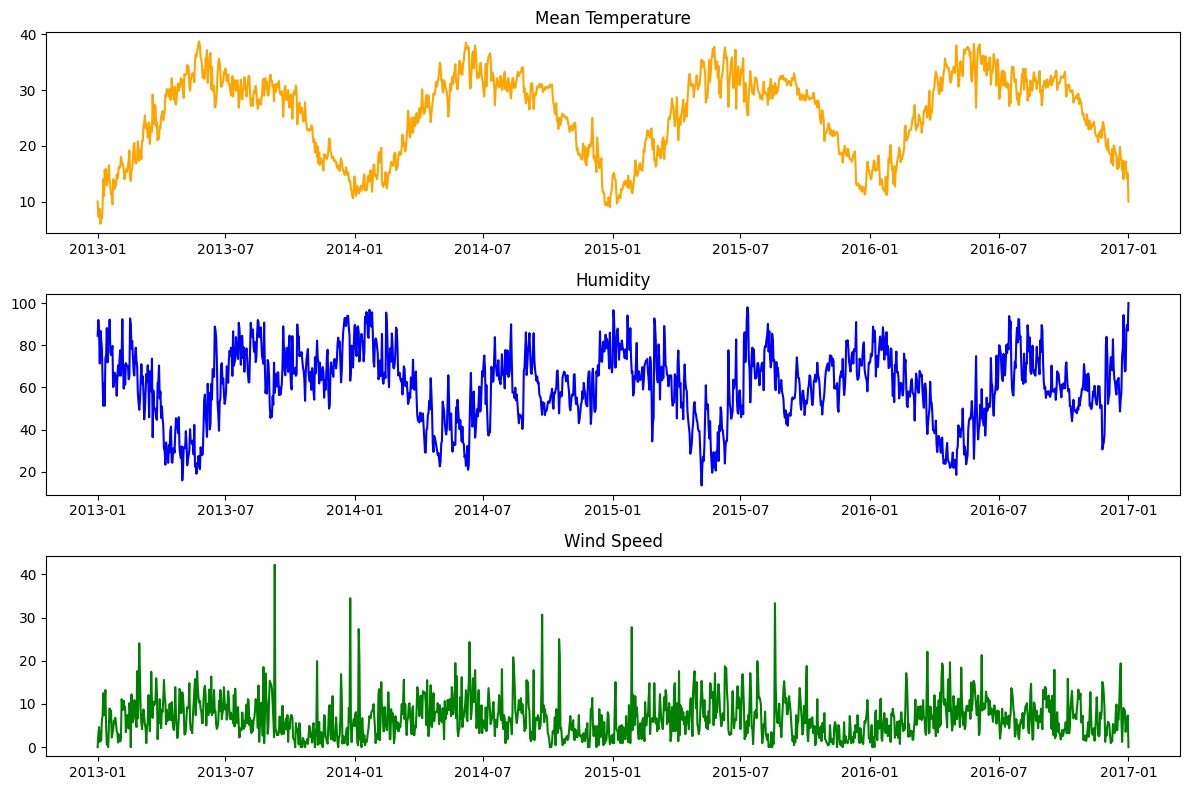

In [7]:
import matplotlib.pyplot as plt

# Time series plot for all variables in train dataset
plt.figure(figsize=(12, 8))
df_train.plot(title="Time Series of Training Dataset", figsize=(12, 6), subplots=True)
plt.tight_layout()
plt.show()

# Subplots for temperature and wind speed
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(df_train.index, df_train['meantemp'], label='Mean Temperature', color='orange')
plt.title("Mean Temperature")

plt.subplot(3, 1, 2)
plt.plot(df_train.index, df_train['humidity'], label='Humidity', color='blue')
plt.title("Humidity")

plt.subplot(3, 1, 3)
plt.plot(df_train.index, df_train['wind_speed'], label='Wind Speed', color='green')
plt.title("Wind Speed")

plt.tight_layout()
plt.show()


<Figure size 1200x1000 with 0 Axes>

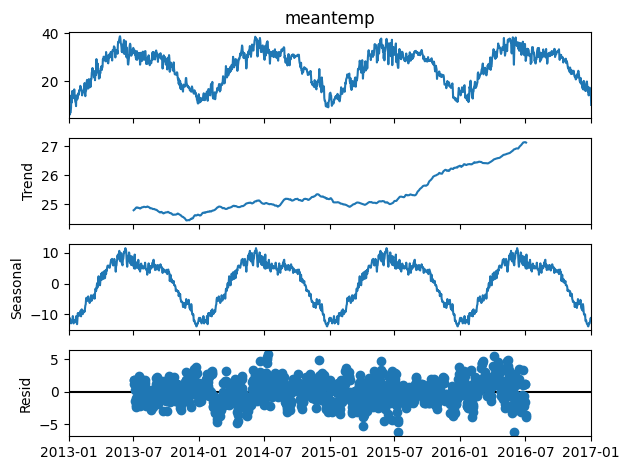


Seasonal Component:
 date
2013-01-01   -11.112191
2013-01-02   -12.097390
2013-01-03   -11.386488
2013-01-04   -11.134559
2013-01-05   -11.317170
Name: seasonal, dtype: float64

Trend Component:
 date
2013-01-01   NaN
2013-01-02   NaN
2013-01-03   NaN
2013-01-04   NaN
2013-01-05   NaN
Name: trend, dtype: float64


In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose daily mean temperature into components
decomposition = seasonal_decompose(df_train['meantemp'], model='additive', period=365)

# Plot the components
plt.figure(figsize=(12, 10))
decomposition.plot()
plt.tight_layout()
plt.show()

# Display seasonal and trend components
print("\nSeasonal Component:\n", decomposition.seasonal.head())
print("\nTrend Component:\n", decomposition.trend.head())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)



ARIMA Model Performance:
Mean Absolute Error (MAE): 9.538775434781877
Root Mean Squared Error (RMSE): 11.412447122662547


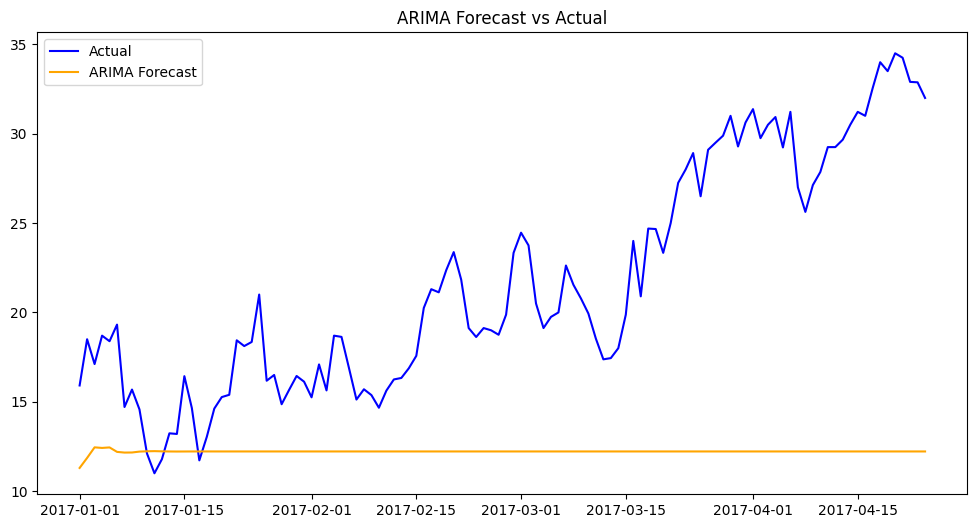

In [9]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prepare data
train_temp = df_train['meantemp']
test_temp = df_test['meantemp']

# Fit ARIMA model
arima_model = ARIMA(train_temp, order=(5, 1, 0))  # Tune order (p, d, q) as needed
arima_fitted = arima_model.fit()

# Forecast
arima_forecast = arima_fitted.forecast(steps=len(test_temp))

# Evaluate performance
arima_mae = mean_absolute_error(test_temp, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test_temp, arima_forecast))

print("\nARIMA Model Performance:")
print(f"Mean Absolute Error (MAE): {arima_mae}")
print(f"Root Mean Squared Error (RMSE): {arima_rmse}")

# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(test_temp.index, test_temp, label='Actual', color='blue')
plt.plot(test_temp.index, arima_forecast, label='ARIMA Forecast', color='orange')
plt.title("ARIMA Forecast vs Actual")
plt.legend()
plt.show()


In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Scale data
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_temp.values.reshape(-1, 1))
scaled_test = scaler.transform(test_temp.values.reshape(-1, 1))

# Create sequences
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(x), np.array(y)

sequence_length = 30  # Use the last 30 days to predict the next day
x_train, y_train = create_sequences(scaled_train, sequence_length)
x_test, y_test = create_sequences(scaled_test, sequence_length)


In [11]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predict on the test set
lstm_predictions = model.predict(x_test)

# Rescale predictions back to original scale
lstm_predictions_rescaled = scaler.inverse_transform(lstm_predictions)
y_test_rescaled = scaler.inverse_transform(y_test)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2167
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0042
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039
Epoch 11/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036
Epoch 12/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039
Epoch 13/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037
Epoch 14/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036
Epoch 15/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038
Epoch 16/20
45/45 


LSTM Model Performance:
Mean Absolute Error (MAE): 1.8262117674654572
Root Mean Squared Error (RMSE): 2.1900078661574627


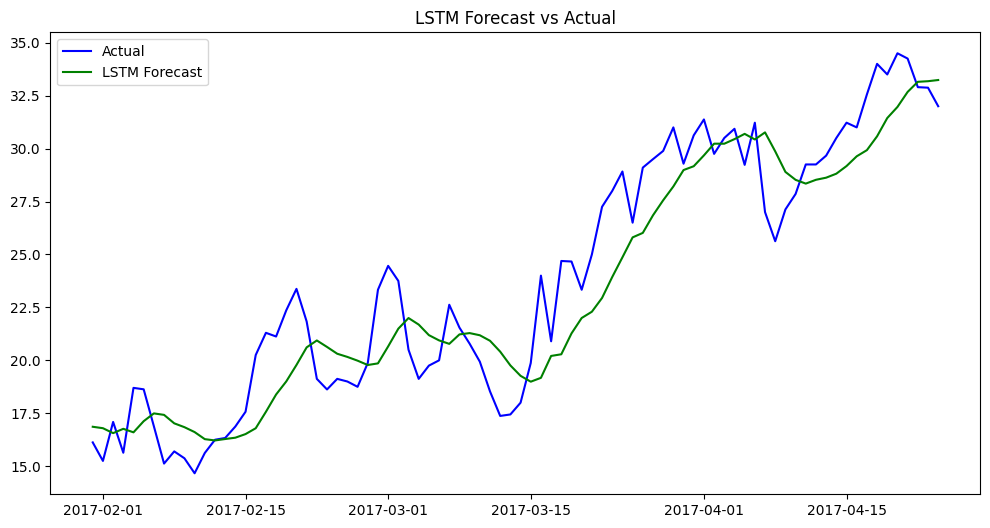

In [12]:
# Evaluate performance
lstm_mae = mean_absolute_error(y_test_rescaled, lstm_predictions_rescaled)
lstm_rmse = np.sqrt(mean_squared_error(y_test_rescaled, lstm_predictions_rescaled))

print("\nLSTM Model Performance:")
print(f"Mean Absolute Error (MAE): {lstm_mae}")
print(f"Root Mean Squared Error (RMSE): {lstm_rmse}")

# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(test_temp.index[sequence_length:], y_test_rescaled, label='Actual', color='blue')
plt.plot(test_temp.index[sequence_length:], lstm_predictions_rescaled, label='LSTM Forecast', color='green')
plt.title("LSTM Forecast vs Actual")
plt.legend()
plt.show()

Mean Absolute Error (MAE): 10.61
Root Mean Squared Error (RMSE): 11.97


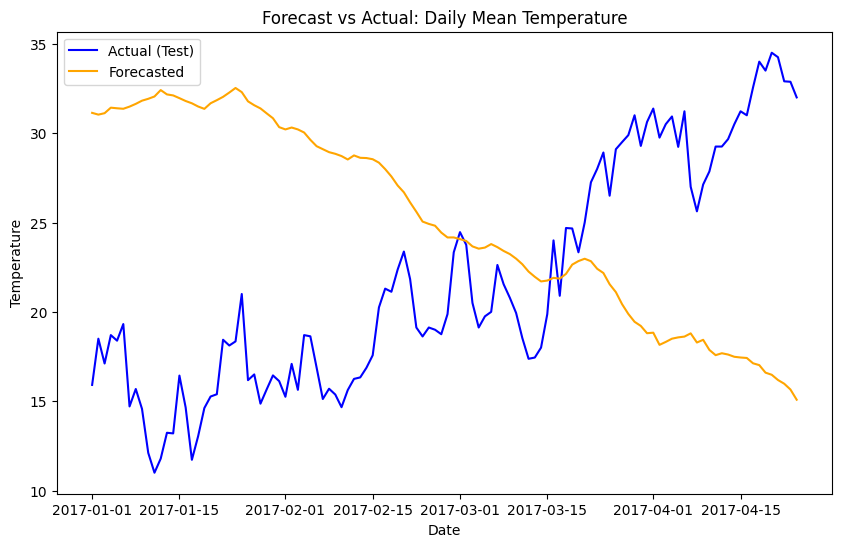

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Define train and test series
train_series = df_train['meantemp']
test_series = df_test['meantemp']

# Simplistic model: Use rolling mean for forecast (e.g., 7-day window)
rolling_mean_window = 7
forecast = train_series.rolling(window=rolling_mean_window).mean()[-len(test_series):]

# Evaluate the model performance
mae = mean_absolute_error(test_series, forecast)
rmse = sqrt(mean_squared_error(test_series, forecast))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot actual vs forecasted
plt.figure(figsize=(10, 6))
plt.plot(test_series.index, test_series, label="Actual (Test)", color="blue")
plt.plot(test_series.index, forecast, label="Forecasted", color="orange")
plt.title("Forecast vs Actual: Daily Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()